In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
# Creating custom legend handles
import matplotlib.lines as mlines
import sys
import os
import re
from tqdm import tqdm

def path_link(path:str):
    sys.path.append(path)

path_link('/master/code/lib')

import utils.stats as stats
import utils.testing_gen as gen
import utils.loading as load
import utils.nn_gen as nn_gen
from utils.tools import array2List

yessss
>>>>>>>>>>>> LOADOING THE V2 OF FEATURES
fndjngkjdfs --NN-sim
['/figures']


In [62]:
PATH = ['/master/code/last/finished_exps/simplest']

In [63]:
class id():
    def __init__(self):
        self.dropout = None
        self.l1 = None
        self.path = None
        self.loss = None
        self.eval_loss = None
        self.eval_sim_loss = None
        self.data_type = None
        self.action_r = None


    def load_id(self, path:str):
        try:
            if 'scaleL1' in path:
                nb_layer_match = re.search(r'scaleL1-(\d+\.\d+|\d+)', path)
                self.l1 = float(nb_layer_match.group(1))
            dropout_match = re.search(r'dropout-(\d+)', path)


            if 'action' in path:
                self.action_r = 1
            else:
                0



            self.dropout = int(dropout_match.group(1))

            if 'noisy' in path:
                self.data_type = 'noisy'

            elif 'normal' in path:
                self.data_type = 'normal'
            
            
            self.path = path

            self.loss = os.path.join(os.path.dirname(path), 'loss_list.npy')
            self.eval_loss = os.path.join(os.path.dirname(path), 'eval_list.npy')
            self.eval_sim_loss = os.path.join(os.path.dirname(path), 'eval_sim_list.npy')
        except:
            print(path)

    def label(self):
        return f'{self.data_type}_action-{self.action_r}_dropout{self.dropout}_l1-{self.l1}'

In [64]:
def get_path_models(path):

    res = []

    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('best.pt'):
                id_model = id()
                id_model.load_id(os.path.join(root, file))

                res.append(id_model)


    return res

In [65]:
res = []

for path in PATH:
    res.extend(get_path_models(path))

In [66]:
for r in res:
    print(f'{r.path} >>> {r.__dict__}')

/master/code/last/finished_exps/simplest/mt-simplest_noisy_scaleL1-0.0001_dropout-0/model_trained/simplest_best.pt >>> {'dropout': 0, 'l1': 0.0001, 'path': '/master/code/last/finished_exps/simplest/mt-simplest_noisy_scaleL1-0.0001_dropout-0/model_trained/simplest_best.pt', 'loss': '/master/code/last/finished_exps/simplest/mt-simplest_noisy_scaleL1-0.0001_dropout-0/model_trained/loss_list.npy', 'eval_loss': '/master/code/last/finished_exps/simplest/mt-simplest_noisy_scaleL1-0.0001_dropout-0/model_trained/eval_list.npy', 'eval_sim_loss': '/master/code/last/finished_exps/simplest/mt-simplest_noisy_scaleL1-0.0001_dropout-0/model_trained/eval_sim_list.npy', 'data_type': 'noisy', 'action_r': None}
/master/code/last/finished_exps/simplest/mt-simplest_noisy_scaleL1-0.0001_dropout-1/model_trained/simplest_best.pt >>> {'dropout': 1, 'l1': 0.0001, 'path': '/master/code/last/finished_exps/simplest/mt-simplest_noisy_scaleL1-0.0001_dropout-1/model_trained/simplest_best.pt', 'loss': '/master/code/las

In [67]:
list_lost = [r.loss for r in res]
list_eval = [r.eval_loss for r in res]
list_sim = [r.eval_sim_loss for r in res]
labels = [r.label() for r in res]

In [68]:
l1_vect = [r.l1 for r in res]
print(l1_vect)

[0.0001, 0.0001, 0.001, 0.001, 0.01, 0.01, 1.0, 1.0, 0.0001, 0.0001, 0.001, 0.001, 0.01, 0.01, 1.0, 1.0, None, None, None, None]


In [70]:
runs_normal=[]
runs_noisy=[]
res_no_drop = []
name_normal = []
name_noisy = []

for i, r in enumerate(res):
    if not r.dropout:
        res_no_drop.append(r)

for i, r in enumerate(res_no_drop):
    if r.data_type == 'noisy':
        runs_noisy.append(r)
    elif r.data_type == 'normal':
        runs_normal.append(r)


list_lost_normal = [r.loss for r in runs_normal]
list_eval_normal = [r.eval_loss for r in runs_normal]
list_sim_normal = [r.eval_sim_loss for r in runs_normal]
labels_normal = [r.label() for r in runs_normal]


list_lost_noisy = [r.loss for r in runs_noisy]
list_eval_noisy = [r.eval_loss for r in runs_noisy]
list_sim_noisy = [r.eval_sim_loss for r in runs_noisy]
labels_noisy = [r.label() for r in runs_noisy]


In [30]:
min_eval = []
for eval_vals in tqdm(list_eval):
    v = np.load(eval_vals)
    min_eval.append(np.min(v))

 60%|██████    | 12/20 [00:00<00:00, 109.74it/s]

100%|██████████| 20/20 [00:00<00:00, 112.15it/s]


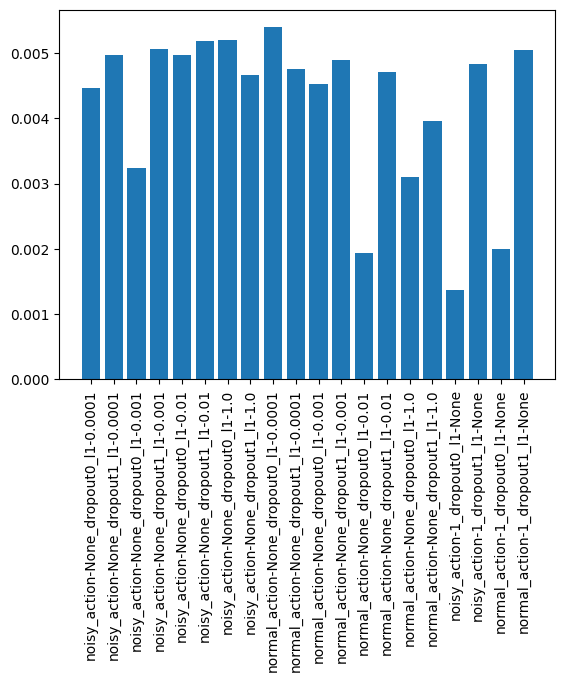

In [31]:
plt.bar(labels, min_eval)
plt.xticks(rotation=90)
plt.show()

20it [00:00, 47.24it/s]


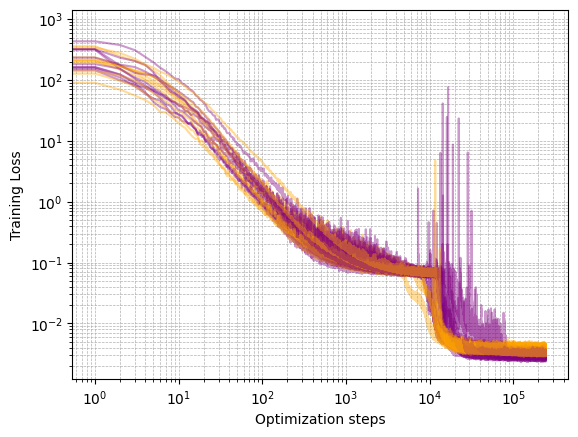

In [32]:
list_eval_loss = []
color = []
layerNorm = 0

for r in res:
    if r.dropout == 1:
        color.append('orange')
    else:
        color.append('purple')


for i, loss in tqdm(enumerate(list_lost)):
    v = np.load(loss)
    plt.loglog(v, color = color[i], alpha = 0.4)

plt.minorticks_on()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Optimization steps')
plt.ylabel('Training Loss')
plt.show()

5it [00:00, 15.51it/s]


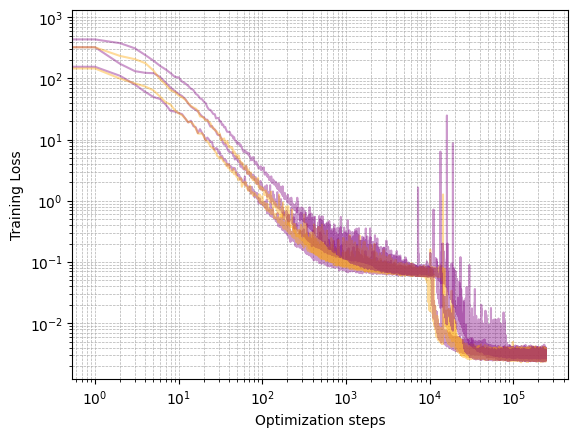

In [71]:
list_eval_loss = []
color = []
layerNorm = 0

for r in res:
    if r.dropout == 1:
        color.append('orange')
    else:
        color.append('purple')


for i, loss in tqdm(enumerate(list_lost_normal)):
    v = np.load(loss)
    plt.loglog(v, color = color[i], alpha = 0.4)

plt.minorticks_on()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Optimization steps')
plt.ylabel('Training Loss')
plt.show()

5it [00:00,  5.84it/s]


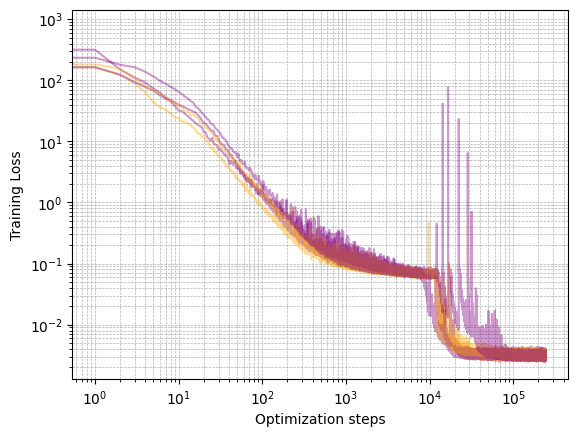

In [72]:
list_eval_loss = []
color = []
layerNorm = 0

for r in res:
    if r.dropout == 1:
        color.append('orange')
    else:
        color.append('purple')


for i, loss in tqdm(enumerate(list_lost_noisy)):
    v = np.load(loss)
    plt.loglog(v, color = color[i], alpha = 0.4)

plt.minorticks_on()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Optimization steps')
plt.ylabel('Training Loss')
plt.show()

20it [00:00, 54.73it/s]


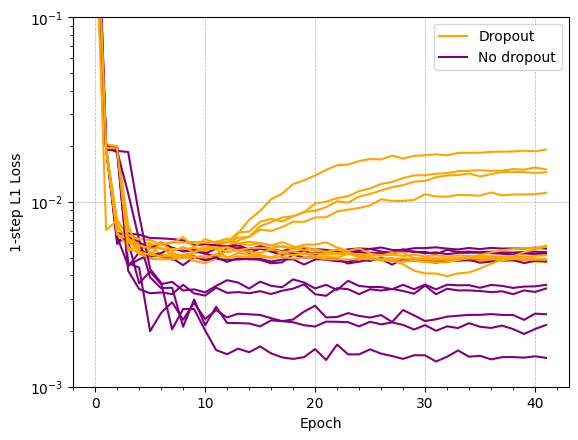

In [33]:
list_eval_loss = []
color = []
layerNorm = 0

for r in res:
    if r.dropout == 1:
        color.append('orange')
    else:
        color.append('purple')


for i, loss in tqdm(enumerate(list_eval)):
    v = np.load(loss)
    #plt.loglog(v, color = color[i])
    plt.plot(v, color = color[i])

plt.yscale('log')
dropout_line = mlines.Line2D([], [], color='orange', label='Dropout')
no_dropout_line = mlines.Line2D([], [], color='purple', label='No dropout')

plt.xlabel('Epoch')
plt.ylabel('1-step L1 Loss')
plt.minorticks_on()
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(handles=[dropout_line, no_dropout_line])
plt.ylim([0.001, 0.1])
plt.show()

5it [00:00, 23.12it/s]


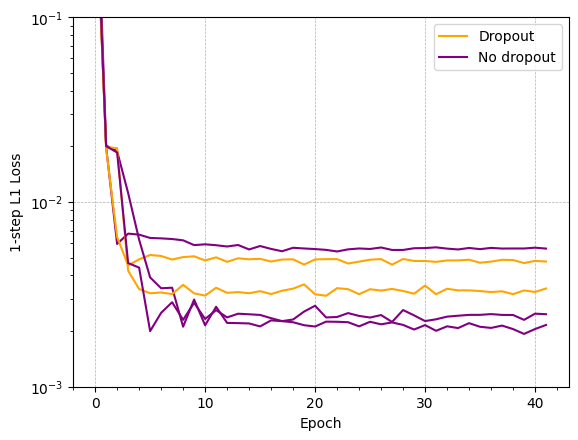

In [73]:
list_eval_loss = []
color = []
layerNorm = 0

for r in res:
    if r.dropout == 1:
        color.append('orange')
    else:
        color.append('purple')


for i, loss in tqdm(enumerate(list_eval_normal)):
    v = np.load(loss)
    #plt.loglog(v, color = color[i])
    plt.plot(v, color = color[i])

plt.yscale('log')
dropout_line = mlines.Line2D([], [], color='orange', label='Dropout')
no_dropout_line = mlines.Line2D([], [], color='purple', label='No dropout')

plt.xlabel('Epoch')
plt.ylabel('1-step L1 Loss')
plt.minorticks_on()
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(handles=[dropout_line, no_dropout_line])
plt.ylim([0.001, 0.1])
plt.show()

0it [00:00, ?it/s]

5it [00:00,  6.40it/s]


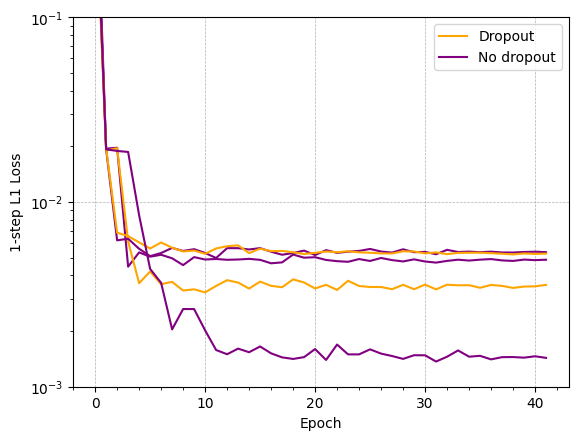

In [75]:
list_eval_loss = []
color = []
layerNorm = 0

for r in res:
    if r.dropout == 1:
        color.append('orange')
    else:
        color.append('purple')


for i, loss in tqdm(enumerate(list_eval_noisy)):
    v = np.load(loss)
    #plt.loglog(v, color = color[i])
    plt.plot(v, color = color[i])

plt.yscale('log')
dropout_line = mlines.Line2D([], [], color='orange', label='Dropout')
no_dropout_line = mlines.Line2D([], [], color='purple', label='No dropout')

plt.xlabel('Epoch')
plt.ylabel('1-step L1 Loss')
plt.minorticks_on()
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(handles=[dropout_line, no_dropout_line])
plt.ylim([0.001, 0.1])
plt.show()

0it [00:00, ?it/s]

20it [00:00, 118.06it/s]


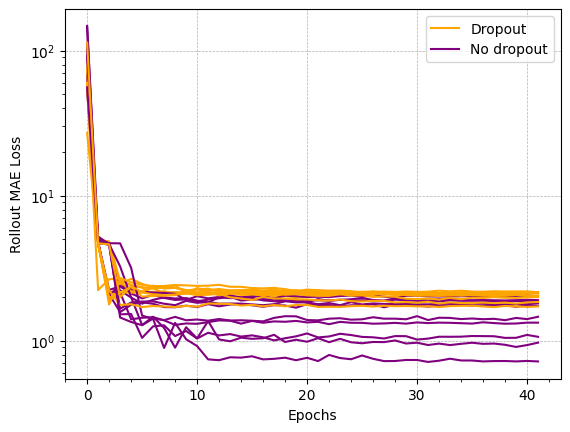

In [34]:
color = []
layerNorm = 0

for r in res:
    if r.dropout == 1:
        color.append('orange')
    else:
        color.append('purple')


for i, loss in tqdm(enumerate(list_sim)):
    v = np.load(loss)
    #plt.loglog(v, color = color[i])
    plt.plot(v, color = color[i])

plt.yscale('log')

dropout_line = mlines.Line2D([], [], color='orange', label='Dropout')
no_dropout_line = mlines.Line2D([], [], color='purple', label='No dropout')

plt.xlabel('Epochs')
plt.ylabel('Rollout MAE Loss')
plt.minorticks_on()
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(handles=[dropout_line, no_dropout_line])
plt.show()

In [36]:
for r in res:
    print(r.l1)

0.0001
0.0001
0.001
0.001
0.01
0.01
1.0
1.0
0.0001
0.0001
0.001
0.001
0.01
0.01
1.0
1.0
None
None
None
None


### l1 values

In [35]:
l1_vals = [r.l1 for r in res]
res_l1 = [r for r in res if r.l1]

In [38]:
line_1 = mlines.Line2D([], [], color='red', label='1.0')
line_2 = mlines.Line2D([], [], color='orange', label='0.01')
line_3 = mlines.Line2D([], [], color='green', label='0.001')
line_4 = mlines.Line2D([], [], color='blue', label='0.0001')

In [49]:
colors = []

for r in res:
    if r.l1 == 1.0:
        colors.append('red')

    if r.l1 == 0.01:
        colors.append('orange')

    if r.l1 == 0.001:
        colors.append('green')

    if r.l1 == 0.0001:
        colors.append('blue')

In [50]:
print(len(colors))

16


In [51]:
print(colors)

['blue', 'blue', 'green', 'green', 'orange', 'orange', 'red', 'red', 'blue', 'blue', 'green', 'green', 'orange', 'orange', 'red', 'red']


16it [00:00, 123.00it/s]


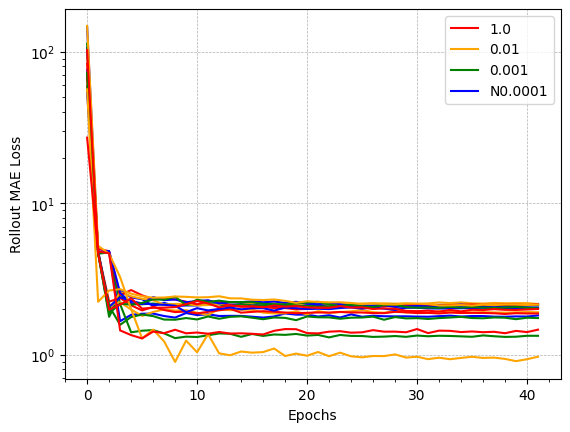

In [52]:
for i, r in tqdm(enumerate(res_l1)):
    v = np.load(r.eval_sim_loss)
    #plt.loglog(v, color = color[i])
    plt.plot(v, color = colors[i])

plt.yscale('log')

plt.xlabel('Epochs')
plt.ylabel('Rollout MAE Loss')
plt.minorticks_on()
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(handles=[line_1, line_2, line_3, line_4])
plt.show()

16it [00:00, 102.31it/s]


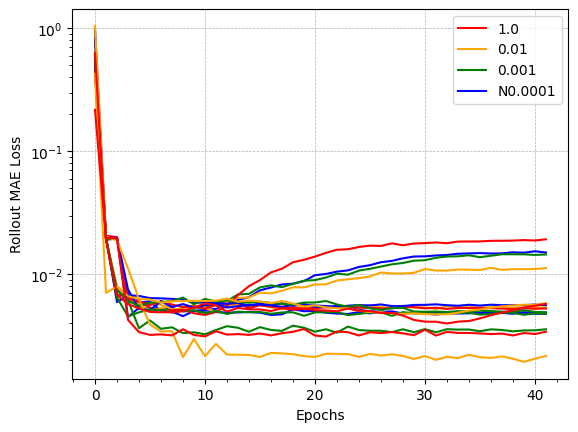

In [53]:
for i, r in tqdm(enumerate(res_l1)):
    v = np.load(r.eval_loss)
    #plt.loglog(v, color = color[i])
    plt.plot(v, color = colors[i])

plt.yscale('log')

plt.xlabel('Epochs')
plt.ylabel('Rollout MAE Loss')
plt.minorticks_on()
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(handles=[line_1, line_2, line_3, line_4])
plt.show()

In [ ]:
min_vals = []

for i, loss in tqdm(enumerate(res_l1)):
    v = np.load(r.eval_loss)
    #plt.loglog(v, color = color[i])
    min_vals.append(np.min(v))



plt.bar(name_noisy, min_vals, color = colors_noisy)
plt.ylabel('1-step L1 Loss')
plt.ylim([0.0008, 0.00095])
plt.show()

print('GERER LES LAYER NORMS')

In [78]:
for r in runs_normal:
    print(r.__dict__)

{'dropout': 0, 'l1': 0.0001, 'path': '/master/code/last/finished_exps/simplest/mt-simplest_normal_scaleL1-0.0001_dropout-0/model_trained/simplest_best.pt', 'loss': '/master/code/last/finished_exps/simplest/mt-simplest_normal_scaleL1-0.0001_dropout-0/model_trained/loss_list.npy', 'eval_loss': '/master/code/last/finished_exps/simplest/mt-simplest_normal_scaleL1-0.0001_dropout-0/model_trained/eval_list.npy', 'eval_sim_loss': '/master/code/last/finished_exps/simplest/mt-simplest_normal_scaleL1-0.0001_dropout-0/model_trained/eval_sim_list.npy', 'data_type': 'normal', 'action_r': None}
{'dropout': 0, 'l1': 0.001, 'path': '/master/code/last/finished_exps/simplest/mt-simplest_normal_scaleL1-0.001_dropout-0/model_trained/simplest_best.pt', 'loss': '/master/code/last/finished_exps/simplest/mt-simplest_normal_scaleL1-0.001_dropout-0/model_trained/loss_list.npy', 'eval_loss': '/master/code/last/finished_exps/simplest/mt-simplest_normal_scaleL1-0.001_dropout-0/model_trained/eval_list.npy', 'eval_si

In [84]:
print(dropout_list)

[0, 0, 0, 0, 0]


In [83]:
print(performances)

['/master/code/last/finished_exps/simplest/mt-simplest_normal_scaleL1-0.0001_dropout-0/model_trained/eval_sim_list.npy', '/master/code/last/finished_exps/simplest/mt-simplest_normal_scaleL1-0.001_dropout-0/model_trained/eval_sim_list.npy', '/master/code/last/finished_exps/simplest/mt-simplest_normal_scaleL1-0.01_dropout-0/model_trained/eval_sim_list.npy', '/master/code/last/finished_exps/simplest/mt-simplest_normal_scaleL1-1e-05_dropout-0/model_trained/eval_sim_list.npy', '/master/code/last/finished_exps/simplest/mt_simplest_action-react_normal_l1_reg-0.0001_dropout-0/model_trained/eval_sim_list.npy']


In [103]:
runs_normal=[]
runs_noisy=[]
res_no_drop = []
name_normal = []
name_noisy = []

#for i, r in enumerate(res):
#    if not r.dropout:
#        res_no_drop.append(r)

for i, r in enumerate(res):
    if r.data_type == 'noisy':
        runs_noisy.append(r)
    elif r.data_type == 'normal':
        runs_normal.append(r)


list_lost_normal = [r.loss for r in runs_normal]
list_eval_normal = [r.eval_loss for r in runs_normal]
list_sim_normal = [r.eval_sim_loss for r in runs_normal]
labels_normal = [r.label() for r in runs_normal]


list_lost_noisy = [r.loss for r in runs_noisy]
list_eval_noisy = [r.eval_loss for r in runs_noisy]
list_sim_noisy = [r.eval_sim_loss for r in runs_noisy]
labels_noisy = [r.label() for r in runs_noisy]


In [110]:
min_sim_eval_noraml = []

for i, r in enumerate(runs_normal):
    v = np.load(r.eval_sim_loss)
    min_sim_eval_noraml.append(np.min(v))

min_sim_eval_noisy = []

for i, r in enumerate(runs_noisy):
    v = np.load(r.eval_sim_loss)
    min_sim_eval_noisy.append(np.min(v))

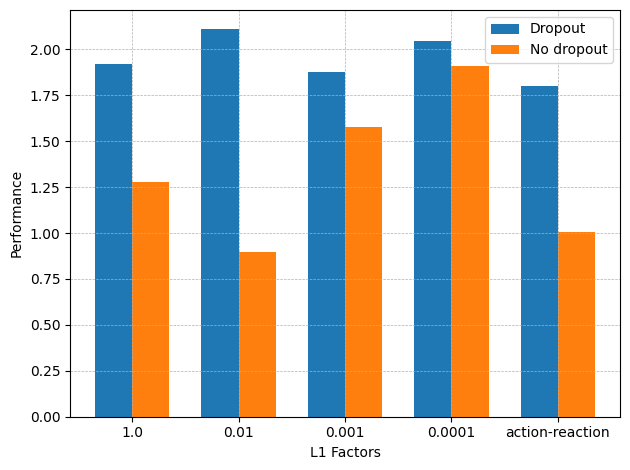

In [107]:
import pandas as pd

l1_values = [r.l1 if r.l1 is not None else 0.0000000001 for r in runs_normal]
dropout_list = [r.dropout for r in runs_normal]
performances = min_sim_eval_noraml
bar_width = 0.35

l1_sorted = sorted(set(l1_values))
n_groups = len(l1_sorted)


df = pd.DataFrame({
    'L1 Factor': l1_values,
    'Performance': performances,
    'Dropout Present': dropout_list
})

df_sorted = df.sort_values(by=['L1 Factor', 'Dropout Present'])
df_sorted_desc = df_sorted.sort_values(by='L1 Factor', ascending=False)


unique_l1_factors_desc = sorted(set(df_sorted_desc['L1 Factor']), reverse=True)

# Separate performances based on dropout presence, now sorted in descending order
performance_with_dropout_desc = []
performance_without_dropout_desc = []

for l1 in unique_l1_factors_desc:
    performance_with_dropout_desc.append(df_sorted_desc[(df_sorted_desc['L1 Factor'] == l1) & (df_sorted_desc['Dropout Present'])]['Performance'].values[0])
    performance_without_dropout_desc.append(df_sorted_desc[(df_sorted_desc['L1 Factor'] == l1) & (~df_sorted_desc['Dropout Present'])]['Performance'].values[0])

# Plotting
fig, ax = plt.subplots()

index = np.arange(len(unique_l1_factors_desc))
bar_width = 0.35

# Bars for dropout present
bars_with_dropout = ax.bar(index, performance_with_dropout_desc, bar_width, label='Dropout')

# Bars for dropout not present
bars_without_dropout = ax.bar(index + bar_width, performance_without_dropout_desc, bar_width, label='No dropout')

# Adding labels, title, and legend
ax.set_xlabel('L1 Factors')
ax.set_ylabel('Rollout MAE (15 steps)')
#ax.set_title('Performance vs L1 Factor with/without Dropout')
ax.set_xticks(index + bar_width / 2)
unique_l1_factors_desc[-1] = 'action-reaction'
ax.set_xticklabels(unique_l1_factors_desc)
ax.legend()

# Adding a grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Showing the plot
plt.tight_layout()
plt.show()

In [109]:
print(l1_values)

[0.0001, 0.0001, 0.001, 0.001, 0.01, 0.01, 1.0, 1.0, 1e-10, 1e-10]


In [98]:
print(performances)

[1.9068293268801386, 2.045000368228705, 1.5747704169002392, 1.8741707211997771, 0.8954336095726502, 2.108545818355161, 1.279338122744544, 1.921742168448271, 1.0054567303098572, 1.802205874645032]


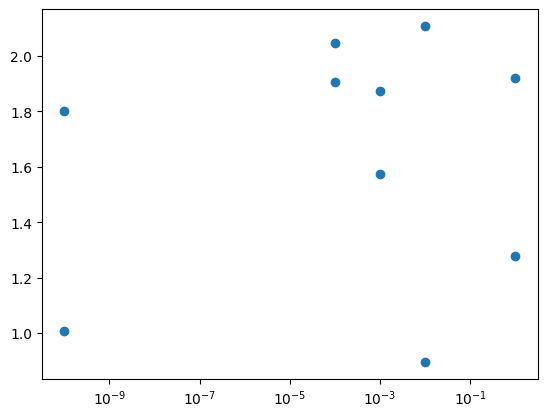

In [105]:
l1_values = [r.l1 if r.l1 is not None else 0.0000000001 for r in runs_normal]
dropout_list = [r.dropout for r in runs_normal]
performances = min_sim_eval_noraml

plt.scatter(l1_values, performances)
plt.xscale('log')
#{plt.yscale('log')

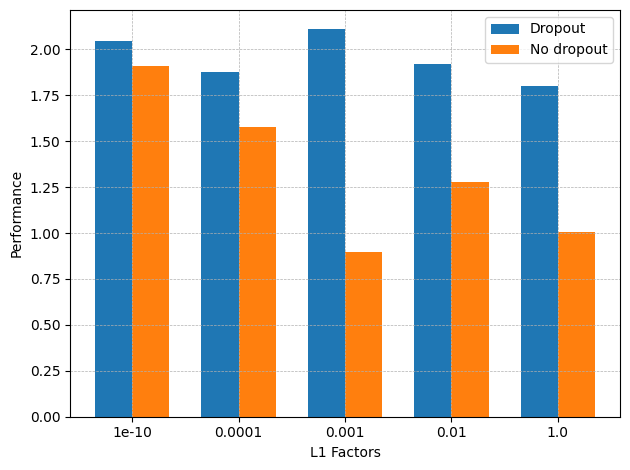

In [90]:


l1_values = [r.l1 if r.l1 is not None else 0.0000000001 for r in runs_normal]
dropout_list = [r.dropout for r in runs_normal]
performances = min_sim_eval_noraml

l1_sorted = sorted(set(l1_values))
n_groups = len(l1_sorted)

performances_with_dropout = [performances[i] for i in range(len(performances)) if dropout_list[i]]
performances_without_dropout = [performances[i] for i in range(len(performances)) if not dropout_list[i]]


fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35

bars_with_dropout = ax.bar(index, performances_with_dropout, bar_width, label='Dropout')
bars_without_dropout = ax.bar(index + bar_width, performances_without_dropout, bar_width, label='No dropout')

ax.set_xlabel('L1 Factors')
ax.set_ylabel('Performance')
#ax.set_title('Performance vs L1 Factor with/without Dropout')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(l1_sorted)
ax.legend()

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()



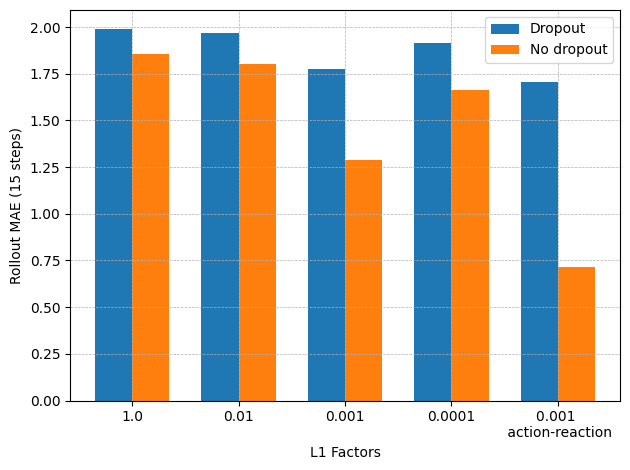

In [112]:
import pandas as pd

l1_values = [r.l1 if r.l1 is not None else 0.0000000001 for r in runs_noisy]
dropout_list = [r.dropout for r in runs_noisy]
performances = min_sim_eval_noisy
bar_width = 0.35

l1_sorted = sorted(set(l1_values))
n_groups = len(l1_sorted)


df = pd.DataFrame({
    'L1 Factor': l1_values,
    'Performance': performances,
    'Dropout Present': dropout_list
})

df_sorted = df.sort_values(by=['L1 Factor', 'Dropout Present'])
df_sorted_desc = df_sorted.sort_values(by='L1 Factor', ascending=False)


unique_l1_factors_desc = sorted(set(df_sorted_desc['L1 Factor']), reverse=True)

# Separate performances based on dropout presence, now sorted in descending order
performance_with_dropout_desc = []
performance_without_dropout_desc = []

for l1 in unique_l1_factors_desc:
    performance_with_dropout_desc.append(df_sorted_desc[(df_sorted_desc['L1 Factor'] == l1) & (df_sorted_desc['Dropout Present'])]['Performance'].values[0])
    performance_without_dropout_desc.append(df_sorted_desc[(df_sorted_desc['L1 Factor'] == l1) & (~df_sorted_desc['Dropout Present'])]['Performance'].values[0])

# Plotting
fig, ax = plt.subplots()

index = np.arange(len(unique_l1_factors_desc))
bar_width = 0.35

# Bars for dropout present
bars_with_dropout = ax.bar(index, performance_with_dropout_desc, bar_width, label='Dropout')

# Bars for dropout not present
bars_without_dropout = ax.bar(index + bar_width, performance_without_dropout_desc, bar_width, label='No dropout')

# Adding labels, title, and legend
ax.set_xlabel('L1 Factors')
ax.set_ylabel('Rollout MAE (15 steps)')
#ax.set_title('Performance vs L1 Factor with/without Dropout')
ax.set_xticks(index + bar_width / 2)
unique_l1_factors_desc[-1] = '0.001 \n action-reaction'
ax.set_xticklabels(unique_l1_factors_desc)
ax.legend()

# Adding a grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Showing the plot
plt.tight_layout()
plt.show()

### stats used

In [5]:
### gen dat

def getParams():
    params = gen.Parameters_Simulation()  


    params.dt = 0.001
    params.v0 = 60
    params.k = 70
    params.epsilon = 0.5
    params.tau = 3.5
    params.R = 1
    params.N = 200
    params.boundary = 100
    params.nbStep = 1000


    params.noisy = 0        # function dans utils
    params.features_x = 'delta'
    params.features_edge = 'first'


    return params

In [22]:
NB_SIM = 5

In [23]:
params1 = getParams()

params2 = getParams()
params2.noisy = 1


data_gt_1  = gen.get_mult_data(params1, NB_SIM)
graphs_gt_1  = gen.sims2Graphs(data_gt_1, params1.features_x)
data_gt_list_1 = array2List(data_gt_1)


data_gt_2 = gen.get_mult_data(params2, NB_SIM)
graphs_gt_2 = gen.sims2Graphs(data_gt_2, params2.features_x)
data_gt_list_2 = array2List(data_gt_2)

0
v0:60, tau:3.5, k:70, epsilon:0.5
0.14285714285714285
0


100%|██████████| 999/999 [00:25<00:00, 39.47it/s]


0
v0:60, tau:3.5, k:70, epsilon:0.5
0.14285714285714285
0


100%|██████████| 999/999 [00:23<00:00, 43.11it/s]


0
v0:60, tau:3.5, k:70, epsilon:0.5
0.14285714285714285
0


100%|██████████| 999/999 [00:20<00:00, 49.64it/s]


0
v0:60, tau:3.5, k:70, epsilon:0.5
0.14285714285714285
0


100%|██████████| 999/999 [00:19<00:00, 52.28it/s] 


0
v0:60, tau:3.5, k:70, epsilon:0.5
0.14285714285714285
0


100%|██████████| 999/999 [00:20<00:00, 47.88it/s]


1
v0:60, tau:3.5, k:70, epsilon:0.5
0.14285714285714285
1


100%|██████████| 999/999 [00:17<00:00, 56.58it/s]


1
v0:60, tau:3.5, k:70, epsilon:0.5
0.14285714285714285
1


100%|██████████| 999/999 [00:20<00:00, 49.23it/s]


1
v0:60, tau:3.5, k:70, epsilon:0.5
0.14285714285714285
1


100%|██████████| 999/999 [00:19<00:00, 52.16it/s]


1
v0:60, tau:3.5, k:70, epsilon:0.5
0.14285714285714285
1


100%|██████████| 999/999 [00:17<00:00, 55.94it/s] 


1
v0:60, tau:3.5, k:70, epsilon:0.5
0.14285714285714285
1


100%|██████████| 999/999 [00:19<00:00, 51.93it/s]


Text(0.5, 0, 'Timesteps')

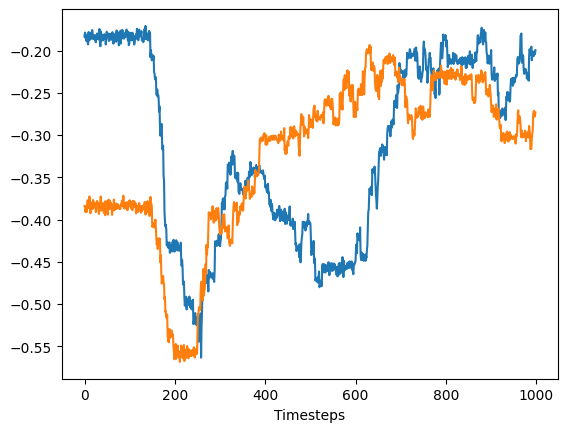

In [40]:
x = data_gt_2.copy()
inds1 = np.arange(x.shape[1]-1)
inds2 = inds1 + 1

speeds = np.sum(x[:, inds2] - x[:, inds1], axis = -2)


s_mean = np.mean(speeds, axis = 0)

plt.plot(s_mean)
plt.xlabel('Timesteps')

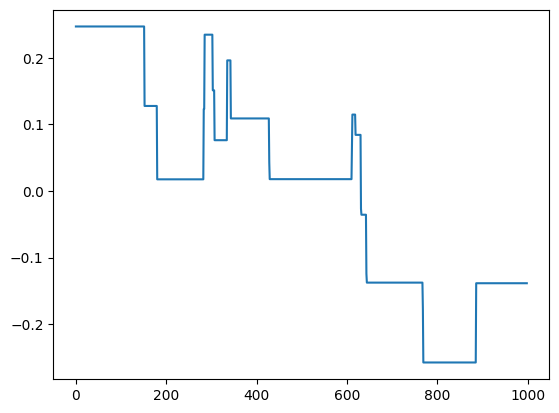

In [29]:

x = data_gt_1[0]
inds1 = np.arange(x.shape[0]-1)
inds2 = inds1 + 1

speeds = x[inds2] - x[inds1]

plt.plot(np.sum(speeds, axis = 1)[:, 0])

### MSD

In [2]:
import stats.stats_re as stats

In [12]:

def MSD_comp(traj, tau):
    T = traj.shape[0]
    i = np.arange(T - tau)
    j = i + tau

    return (np.linalg.norm(traj[j, :, :] - traj[i, :, :], axis = -1))**2


def MSD(traj: np.array)-> np.array:
    """
    Allows to compute the Mean Squared Displacement of the trajectories for all timestamps
    
    Args:
    -----
    - `traj`: np.array of N trajectories of length T [NxT]
    
    Output:
    -------
    Mean Squared Displacement for all timestamps
    """

    res = []
    T = traj.shape[0]
    
    for tau in range(1, T):
        val = np.mean(np.mean(MSD_comp(traj, tau), axis=0), axis=0)
        res.append(val)

    return res

def MSD_stat(sims:list, display:bool = True, color:str = 'blue', label = 'v0')->np.array:
    """ 
    Function to apply MSD to a group of simulations

    NOTE: test

    Args:
    -----
        - `sims` (list): list of simualtions

    Returns:
    --------
        np array [#Sim, T-1] of MSD computations
    """

    res = np.zeros((len(sims), sims[0].shape[0]-1))
    for i in range(len(sims)):
        sim = sims[i]
        res[i, :] = np.array(MSD(sim))


    if display:
        x = np.arange(sims[0].shape[0]-1)
        y = np.mean(res, axis = 0)
        std = np.std(res, axis = 0)
        plt.loglog(x, y, color = color, zorder = 1, label = label)
        plt.fill_between((x), (y - std), (y+std), color = color, alpha = 0.4, zorder = 2)
        
        plt.xlabel('Timesteps')
        plt.ylabel('MSD')
        plt.grid()

    return res


bhfdefbhjbfhbsfb


array([[2.05694957e-03, 8.22188968e-03, 1.84837805e-02, 3.28288143e-02,
        5.12413790e-02, 7.37049401e-02, 1.00202651e-01, 1.30718057e-01,
        1.65235134e-01, 2.03738511e-01, 2.46213299e-01, 2.92644922e-01,
        3.43019847e-01, 3.97325786e-01, 4.55551185e-01, 5.17685080e-01,
        5.83716838e-01, 6.53636088e-01, 7.27432708e-01, 8.05096890e-01,
        8.86619092e-01, 9.71990234e-01, 1.06120117e+00, 1.15424323e+00,
        1.25110777e+00, 1.35178630e+00, 1.45627095e+00, 1.56455356e+00,
        1.67662551e+00, 1.79247841e+00, 1.91210356e+00, 2.03549320e+00,
        2.16263935e+00, 2.29353399e+00, 2.42817024e+00, 2.56654233e+00,
        2.70864475e+00, 2.85447194e+00, 3.00401834e+00, 3.15727826e+00,
        3.31424588e+00, 3.47491527e+00, 3.63928037e+00, 3.80733489e+00,
        3.97907235e+00, 4.15448610e+00, 4.33356920e+00, 4.51631466e+00,
        4.70271529e+00, 4.89276373e+00, 5.08645251e+00, 5.28377424e+00,
        5.48472179e+00, 5.68928795e+00, 5.89746560e+00, 6.109247

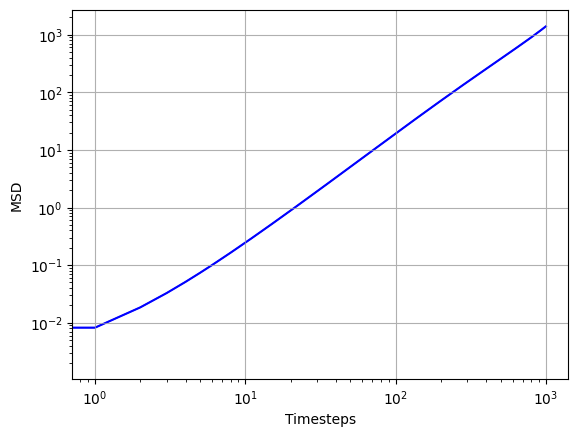

In [13]:
stats.MSD_stat(data_gt_1)

#applyMSD(data_gt_2, color='red')
#MSD_stat(data_gt_1)

### SELF_SCATTERING

In [9]:
ssf = stats.applySelfScattering(data_gt_1, display=False)

(0.0, 300.0)

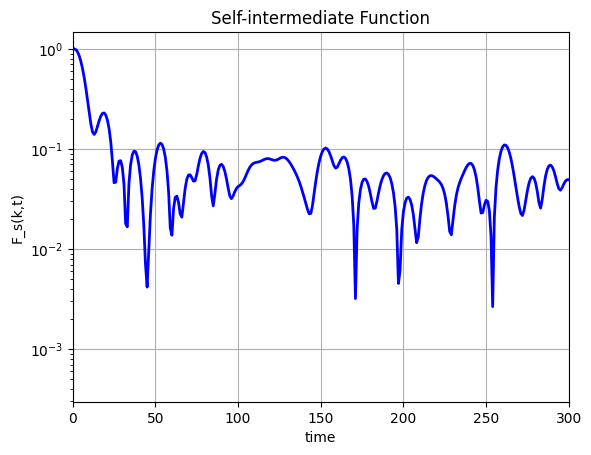

In [14]:
t = np.arange(1, ssf[0].shape[0] + 1)

plt.grid()
plt.semilogy(t, np.mean(ssf, axis=0), color = 'blue', lw=2)
# plt.fill_between(t, r-delta, r+delta, color = color, alpha = 0.4)
plt.xlabel('time')
plt.ylabel('F_s(k,t)')
plt.title('Self-intermediate Function')
plt.grid(True)
plt.xlim([0, 300])

### radial distribution function

In [10]:
rdfValues = stats.apply_rdf(data_gt_1)

100%|██████████| 1000/1000 [00:06<00:00, 154.17it/s]


In [11]:
print(rdfValues)

(array([0.00000000e+00, 9.43366039e-02, 2.30443437e+00, 6.19617096e+00,
       8.99648663e+00, 1.23835843e+01, 1.58791873e+01, 2.18735375e+01,
       1.63758488e+01, 6.93186453e-01, 4.61439007e-01, 6.10183896e-01,
       1.20780766e+00, 1.20255786e+00, 8.98690297e-01, 1.38171320e+00,
       1.10873996e+00, 9.25943632e-01, 8.97133450e-01, 9.36301188e-01,
       1.01042307e+00, 1.00050941e+00, 1.00907196e+00, 1.01528046e+00,
       1.02148583e+00, 9.78821401e-01, 1.05255712e+00, 1.09279932e+00,
       1.06567454e+00, 1.08155479e+00, 1.10597455e+00, 1.10334194e+00,
       1.08017784e+00, 1.11924752e+00, 1.17658678e+00, 1.18869181e+00,
       1.14367752e+00, 1.11666101e+00, 1.19347218e+00, 1.22088447e+00,
       1.20609905e+00, 1.18350667e+00, 1.18334151e+00, 1.19361151e+00,
       1.19472007e+00, 1.21762718e+00, 1.14707157e+00, 1.19146103e+00,
       1.21788935e+00, 1.23459202e+00, 1.18579577e+00, 1.19239028e+00,
       1.24936060e+00, 1.24069136e+00, 1.25032136e+00, 1.28637736e+00,
     

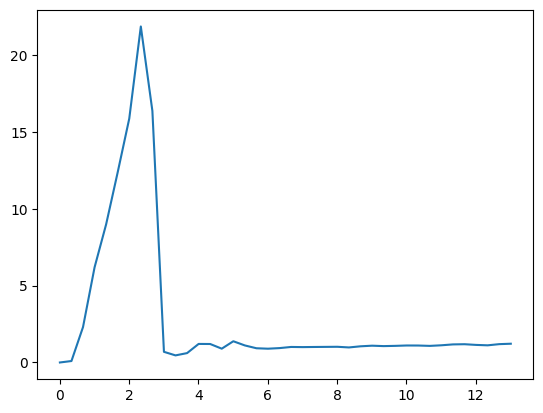

In [13]:
plt.plot(rdfValues[1][:40], rdfValues[0][:40])

### speed distribution

In [41]:
def scaleMagnVel(sim:np.array, bins:np.array, bins2:np.array, display:bool = True)->np.array:
    """ 
    Fucntion to compute the velocity maginutude distr

    Args:
    -----
        - `sim`: simulatioon 
        - `bins`: bins array
        - `bins2`: component histogram bins

    Returns:
    --------
        the tuple of velocities magnitude and components
    """

    # get the velocits

    inds0 = np.arange(sim.shape[0]-1)
    inds = inds0 + 1

    speeds = sim[inds] - sim[inds0]
    vmagn = np.linalg.norm(speeds, axis=-1)
    vx = speeds[:, :, 0]
    vy = speeds[:, :, 1]

    # average speed according to the cells
    avgSpeed = np.mean(vmagn, axis = -1)


    # intitialize the three histograms

    magnDist = np.zeros(len(bins)-1)
    magnDistX = np.zeros(len(bins2)-1)
    magnDistY = np.zeros(len(bins2)-1)


    # loop over cells
    for i in range(speeds.shape[0]):
                
        vdist,_=np.histogram(vmagn[i, :]/avgSpeed[i],bins,density=True)
        magnDist += vdist

        vdistx,_=np.histogram(vx[i, :]/avgSpeed[i],bins2,density=True)
        magnDistX += vdistx


        vdisty,_=np.histogram(vy[i, :]/avgSpeed[i],bins2,density=True)
        magnDistY += vdisty
    
    magnDist = magnDist/speeds.shape[0]
    magnDistX = magnDistX/speeds.shape[0]
    magnDistY = magnDistY/speeds.shape[0]
    


    if display:
        fig=plt.figure()
        db=bins[1]-bins[0]
        plt.grid()
        plt.semilogy(bins[1:]-db/2,magnDist,'r.-',lw=2)
        plt.xlabel('v/<v>')
        plt.ylabel('P(frac{v}{<v>})')
        plt.title('Scaled velocity magnitude distribution')

        fig=plt.figure()
        db=bins2[1]-bins2[0]
        plt.grid()
        plt.semilogy(bins2[1:]-db/2,magnDistX,'r.-',lw=2)
        plt.semilogy(bins2[1:]-db/2,magnDistY,'k.-',lw=2)
        plt.xlabel('v/<v>')
        plt.ylabel('$P(fracv/<v>)$')
        plt.title('Scaled velocity component (x & y) distribution')


    return magnDist, magnDistX, magnDistY



In [54]:
def apply_hist(data, bins1, bins2):

    res_norm = None
    res_x = None
    res_y = None
    for i in range(len(data)):
        norm, x, y = scaleMagnVel(data[i], bins1, bins2, display = False)

        if res_norm is None:
            res_norm = norm
        else:
            res_norm = np.vstack((res_norm, norm))

        if res_x is None:
            res_x = x
        else:
            res_x = np.vstack((res_x, x))

        if res_y is None:
            res_y = y
        else:
            res_y = np.vstack((res_y, y))

    return res_norm, res_x, res_y

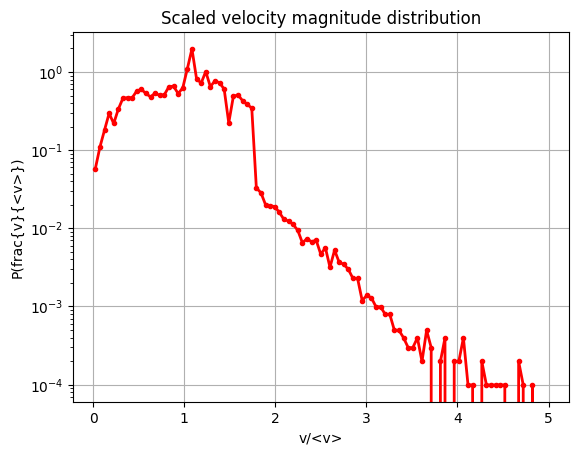

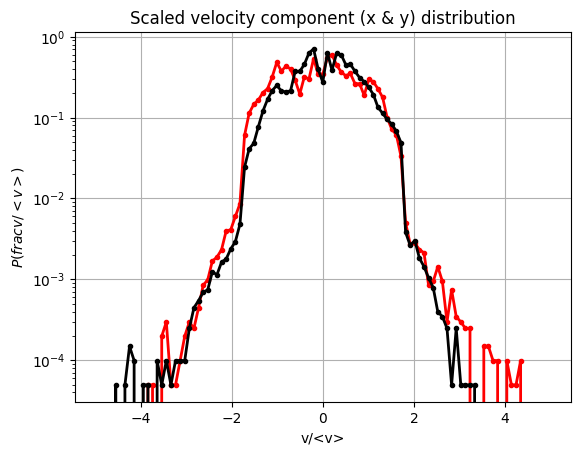

In [46]:
a = np.linspace(0, 5, 100)
b= np.linspace(-5, 5, 100)

res = scaleMagnVel(data_gt_2[3].copy(), a, b)

In [55]:
res = apply_hist(data_gt_1.copy(), a, b)

In [53]:
print(res)

None


Text(0.5, 1.0, 'Scaled velocity magnitude distribution')

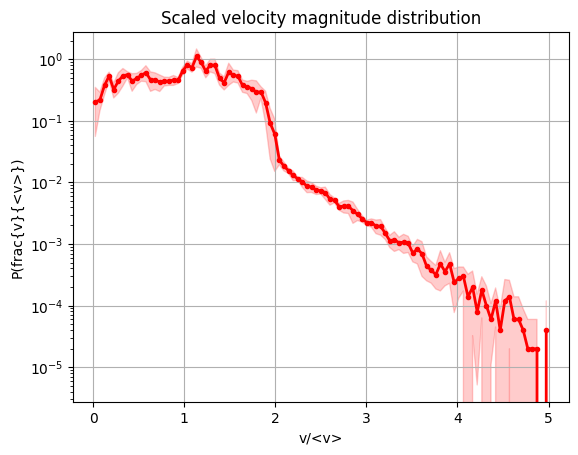

In [57]:
db1 = a[1] - a[0]
db2 = b[1] - b[0]

mean_norm = np.mean(res[0], axis = 0)
std_norm = np.std(res[0], axis = 0)

plt.grid()
plt.semilogy(a[1:]-db1/2,mean_norm,'r.-',lw=2)
plt.fill_between(a[1:]-db1/2, mean_norm - std_norm, mean_norm + std_norm, color = 'r', alpha = 0.2)
plt.xlabel('v/<v>')
plt.ylabel('P(frac{v}{<v>})')
#plt.title('Scaled velocity magnitude distribution')

Text(0, 0.5, 'P(frac{v}{<v>})')

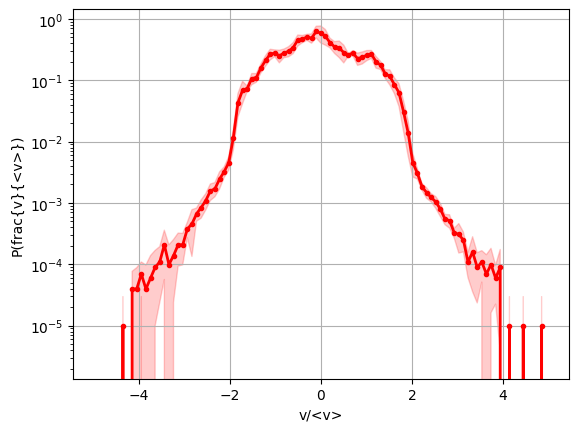

In [59]:
mean_x = np.mean(res[1], axis = 0)
std_x = np.std(res[1], axis = 0)

plt.grid()
plt.semilogy(b[1:]-db2/2,mean_x,'r.-',lw=2)
plt.fill_between(b[1:]-db2/2, mean_x - std_x, mean_x + std_x, color = 'r', alpha = 0.2)
plt.xlabel('v/<v>')
plt.ylabel('P(frac{v}{<v>})')

Text(0, 0.5, 'P(frac{v}{<v>})')

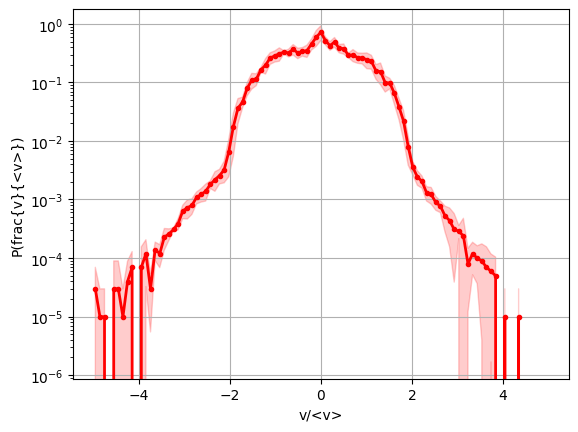

In [60]:
mean_y = np.mean(res[2], axis = 0)
std_y = np.std(res[2], axis = 0)

plt.grid()
plt.semilogy(b[1:]-db2/2,mean_y,'r.-',lw=2)
plt.fill_between(b[1:]-db2/2, mean_y - std_y, mean_y + std_y, color = 'r', alpha = 0.2)
plt.xlabel('v/<v>')
plt.ylabel('P(frac{v}{<v>})')